In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica_ensamble as sle


# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [2]:
df = pd.read_pickle('../../Datos_Mod3/df_balanceado.pkl').reset_index(drop=True) # importo mi modelo más importante
df.head()

,Age_robust,BusinessTravel,Department,DistanceFromHome_robust,EducationField,MaritalStatus,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,...,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4,Attrition
0,1.153846,0.146188,0.146751,-0.083333,0.165644,0.118384,1.512817,-0.333333,-0.500000,-1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.384615,0.260135,0.156098,0.250000,0.165644,0.263158,-0.130517,-0.666667,1.500000,-0.444444,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,-0.307692,0.260135,0.156098,0.833333,0.111156,0.118384,2.656358,-0.333333,0.166667,-0.555556,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,0.153846,0.076433,0.156098,-0.416667,0.165644,0.118384,0.630126,0.333333,-0.500000,0.333333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,-0.307692,0.146188,0.156098,0.250000,0.166324,0.263158,-0.470523,0.666667,-0.333333,-0.111111,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


## Regresión logística

In [3]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_logreg = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_logreg.head().T

,train,test
accuracy,0.875207,0.874172
precision,0.880548,0.879276
recall,0.875207,0.874172
f1,0.873539,0.873011
kappa,0.742492,0.744288
auc,0.935477,0.927465
time_seconds,0.005302,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.005302
nucleos_usados,NaN,NaN


Nos da unas métricas relativamente buenas en general hasta llegar al Kappa, donde nos muestra que existe mucha aleatoriedad en sus predicciones. Esot nos indica que nuestra modelo a pesar de tener buenas métricas estas han sido fruto del azar.

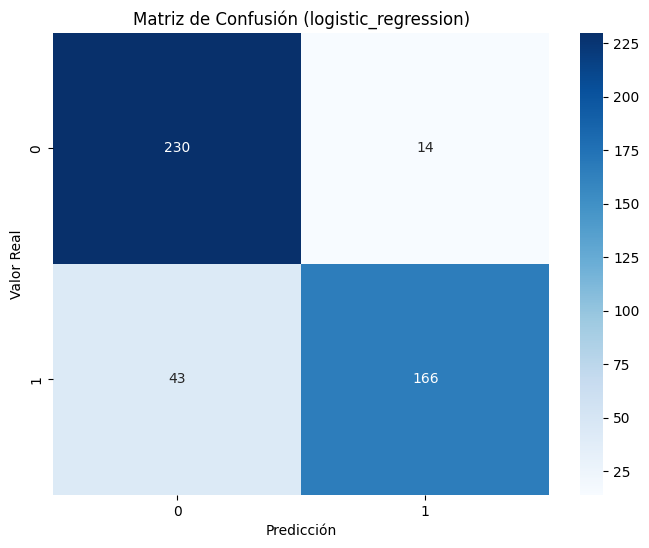

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 3\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


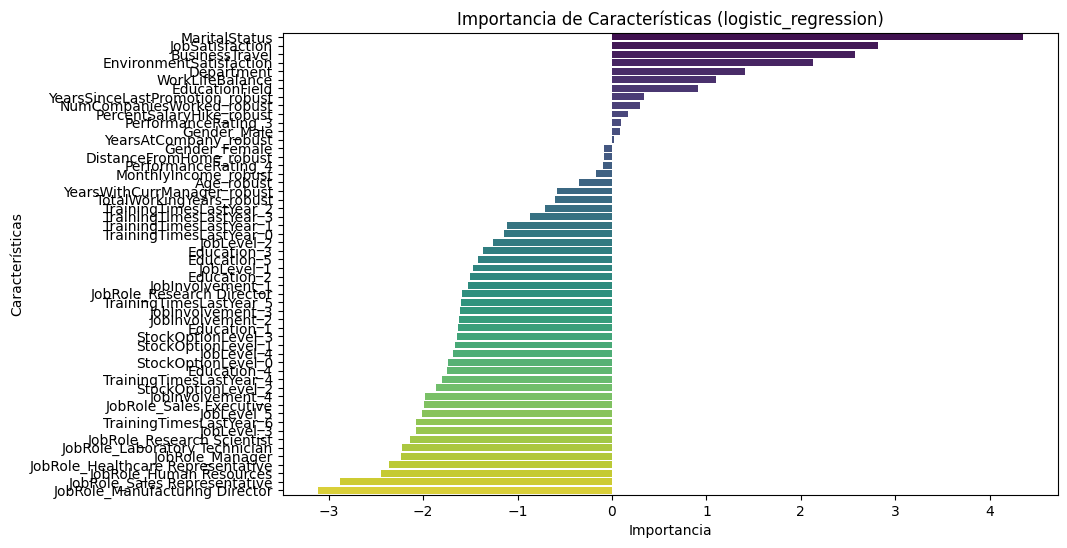

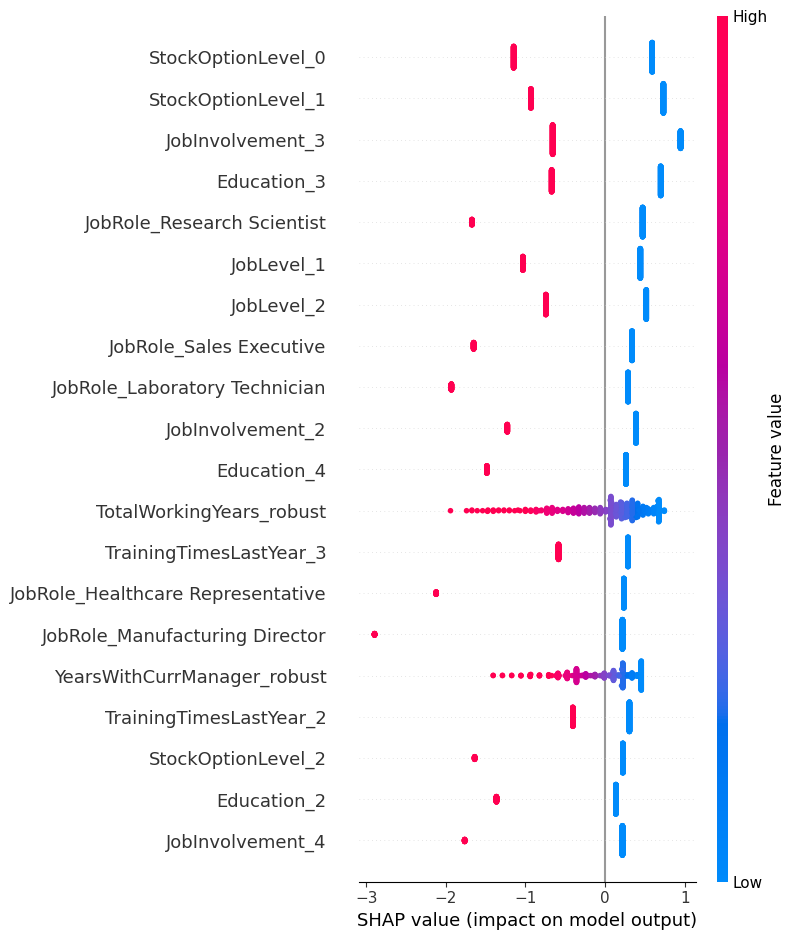

In [4]:
logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression') 
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

Genera un poco de sorpresa que haya acertado tanto en los verdaderos positivos y verdaderos negativos, a pesar del azar. Sin embargo, donde podemos ver las fallas es en los falsos negativos ya que me predice muchos casos donde los empleados no se irán pero sí lo hacen.

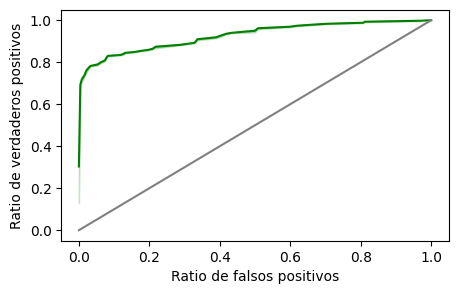

In [5]:
logistica.graficar_roc('logistic_regression')

## Decision Tree

In [6]:
params_grid_tree = {
                'max_depth': [9,10,12,15],
                'min_samples_split': [4,5,6,10,12],
                'min_samples_leaf': [1, 2, 3,4]
}

In [7]:
logistica.ajustar_modelo("tree", param_grid=params_grid_tree) # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_dectree = logistica.calcular_metricas(modelo_nombre =  "tree")
df_dectree.head().T

El mejor modelo es DecisionTreeClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=10)


,train,test
accuracy,0.912203,0.779249
precision,0.912257,0.779899
recall,0.912203,0.779249
f1,0.912024,0.779437
kappa,0.821200,0.556760
auc,0.976009,0.833310
time_seconds,0.002001,NaN
n_jobs,8.000000,NaN
tiempo_computacion(segundos),NaN,0.002001
nucleos_usados,NaN,8.000000


Aquí se puede apreciar algo de overfitting por la diferencia que vemos en nuestro train-test. Además de enormes diferencias para el kappa entre estos fos, por lo que no sería ideal apostar por este modelo.

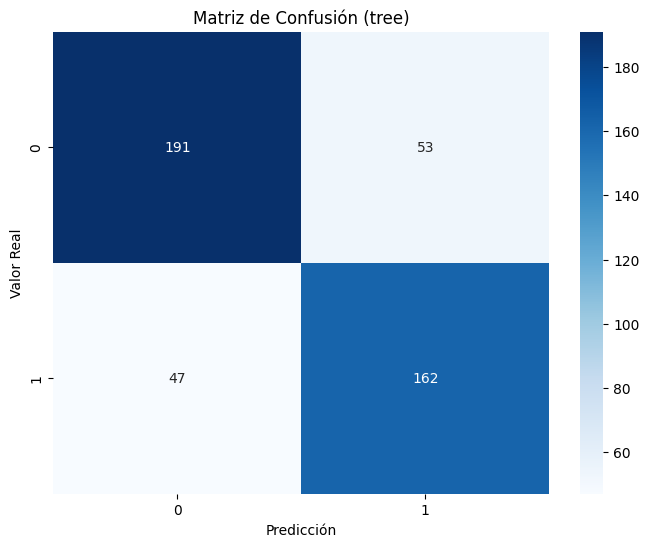

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 3\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


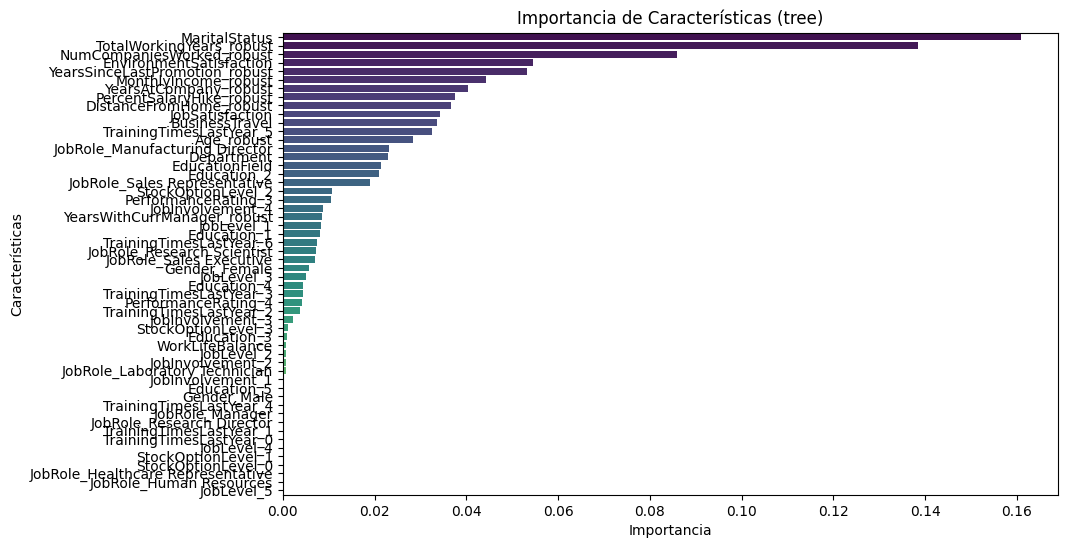

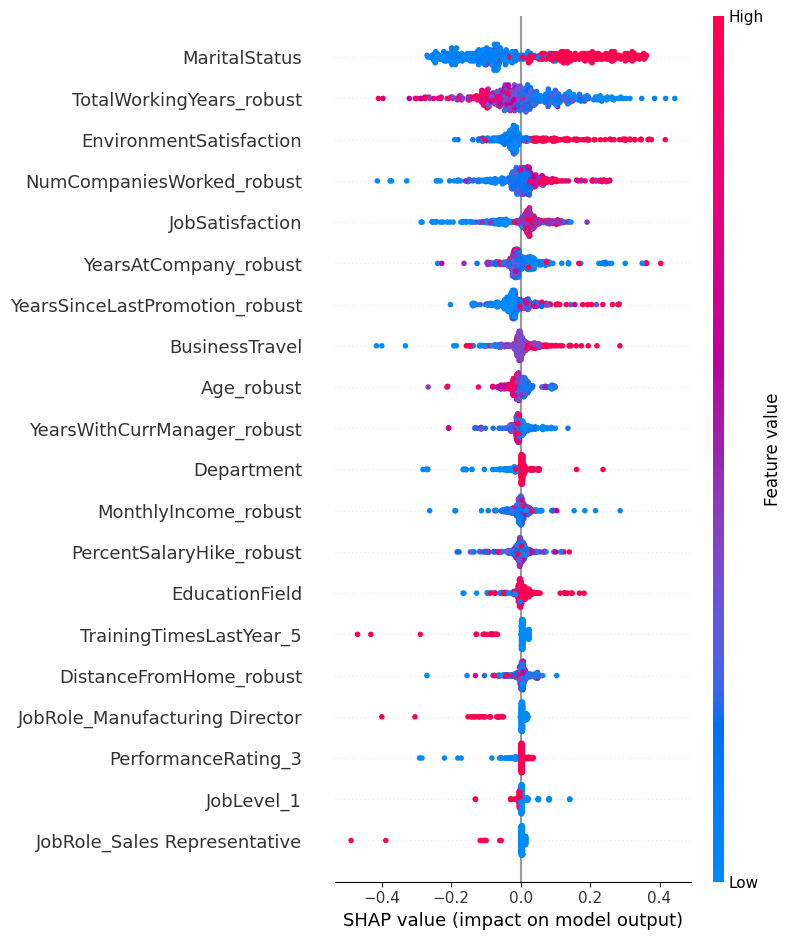

In [8]:
logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree') 
logistica.plot_shap_summary(modelo_nombre="tree")

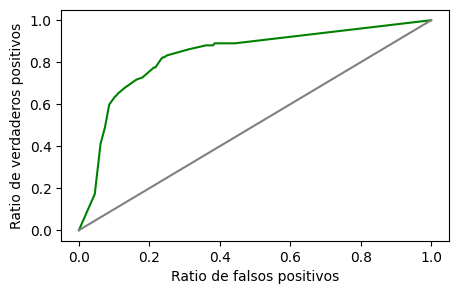

In [9]:
logistica.graficar_roc('tree')

# Random Forest

In [10]:
params_random =     {
        'n_estimators': [100,200, 300,400],
        'max_depth': [7,10,15,18,21],
        'min_samples_split': [2, 5, 8,10,12],
        'min_samples_leaf': [1, 2, 4,7,10]
    }

In [11]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest", param_grid=params_random)

# llamamos al metodo para obtener los resultaods de las predicciones
df_random = logistica.calcular_metricas(modelo_nombre =  "random_forest")
df_random.head()

El mejor modelo es RandomForestClassifier(max_depth=15, n_estimators=300, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.187861,-1.0,NaN,NaN
test,0.909492,0.912449,0.909492,0.908966,0.816576,0.957506,NaN,NaN,0.187861,-1.0


Tiene muy buenas métricas, en sentido general pero volvemos a observar que en cuanto a Kappa existe mucha divererncia en estos dos grupos. 

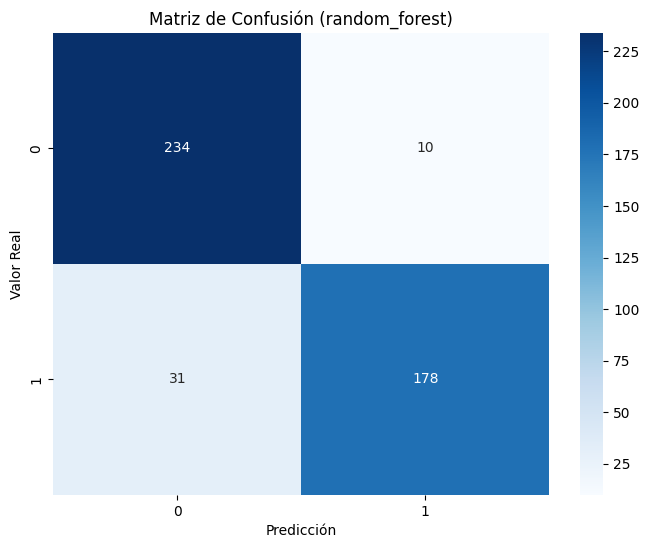

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 3\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


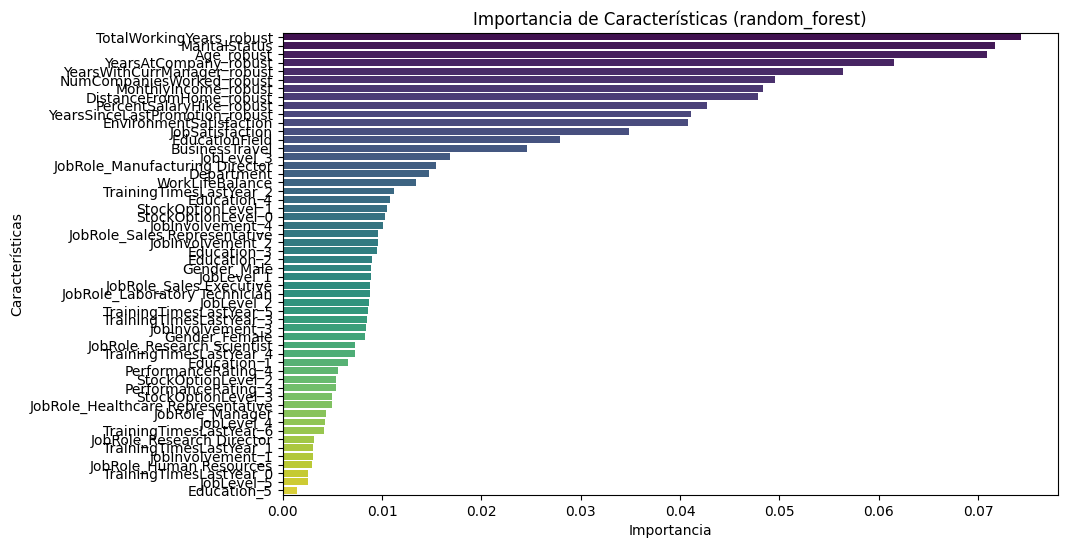

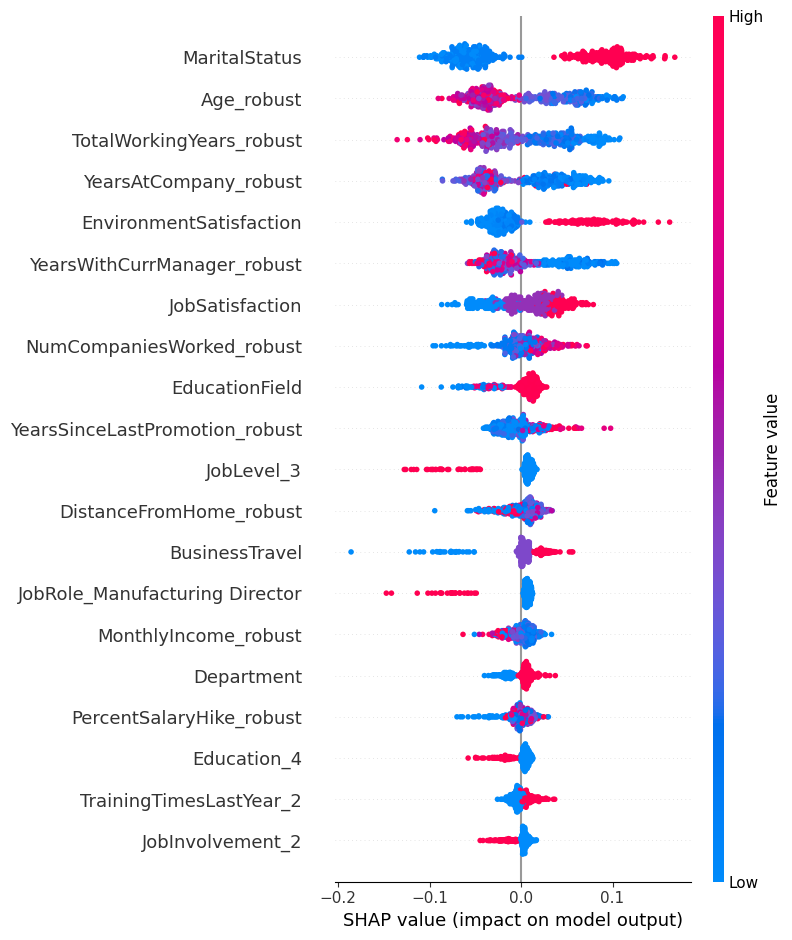

In [12]:
logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest') 
logistica.plot_shap_summary(modelo_nombre="random_forest")

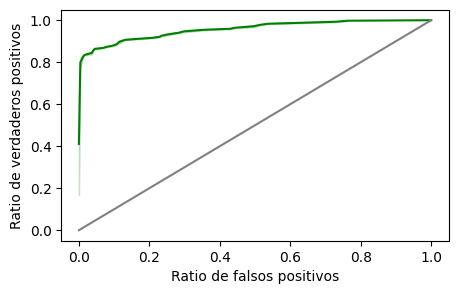

In [13]:
logistica.graficar_roc('random_forest')

Aparentemente es un buen modelo pero, y su curva es casi ideal en un grado donde se pueda predecir al 100% pero tenemos valores muy distantes para el Kappa por lo que no sería muy seguro apostar por su legitimidad.

Sin embargo, aquí se ve cómo el modelo está siendo influenciado por las variables que se considerarían normalmente predictoras para estos casos como las numéricas y las referentes a sus evalucaciones, además de sus autoevaluaciones en relación a su trabajo en temas de satisfacción.

## Gradient Booster

In [14]:
params_gradient = {
                'n_estimators': [100, 200, 300, 350],
                'learning_rate': [0.01, 0.1, 0.2, 0.25],
                'max_depth': [3, 4, 5, 8, 10, 12],
                'min_samples_split': [2,3,4, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0] }

In [ ]:
logistica.ajustar_modelo("gradient_boosting", param_grid=params_gradient) # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_grad = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting")
df_grad.head().T

Podríamos decir que este es un modelo casi perfecto, recordando que este aprende de sus errores a medida que avanza en los árboles que crea. 

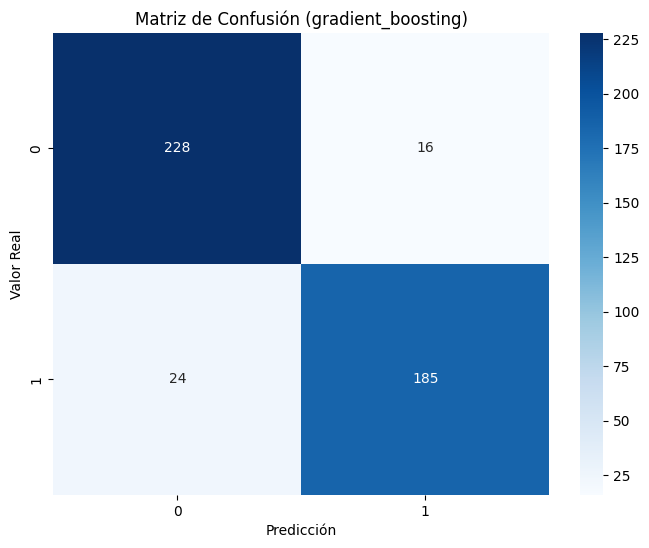

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 3\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


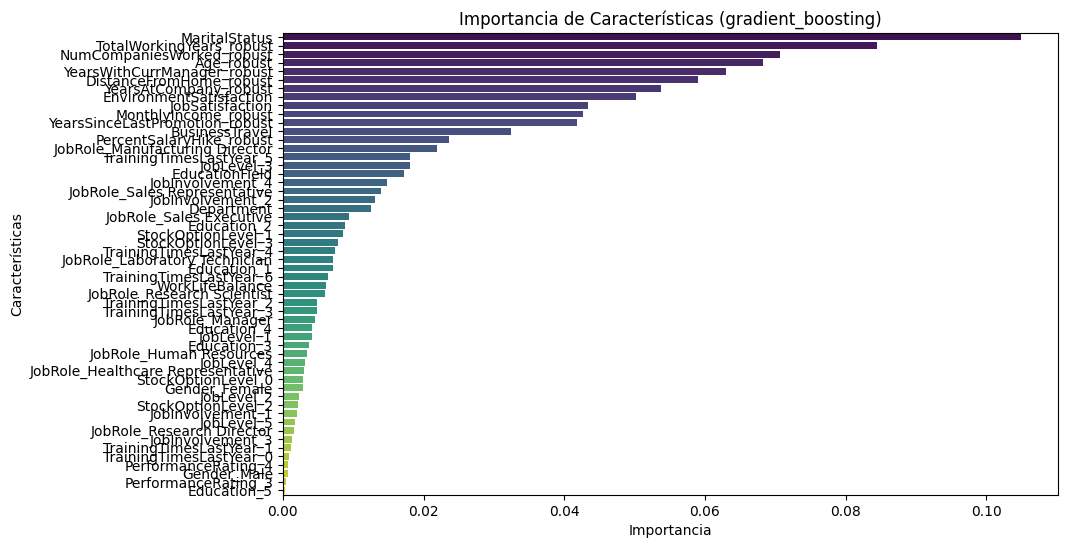

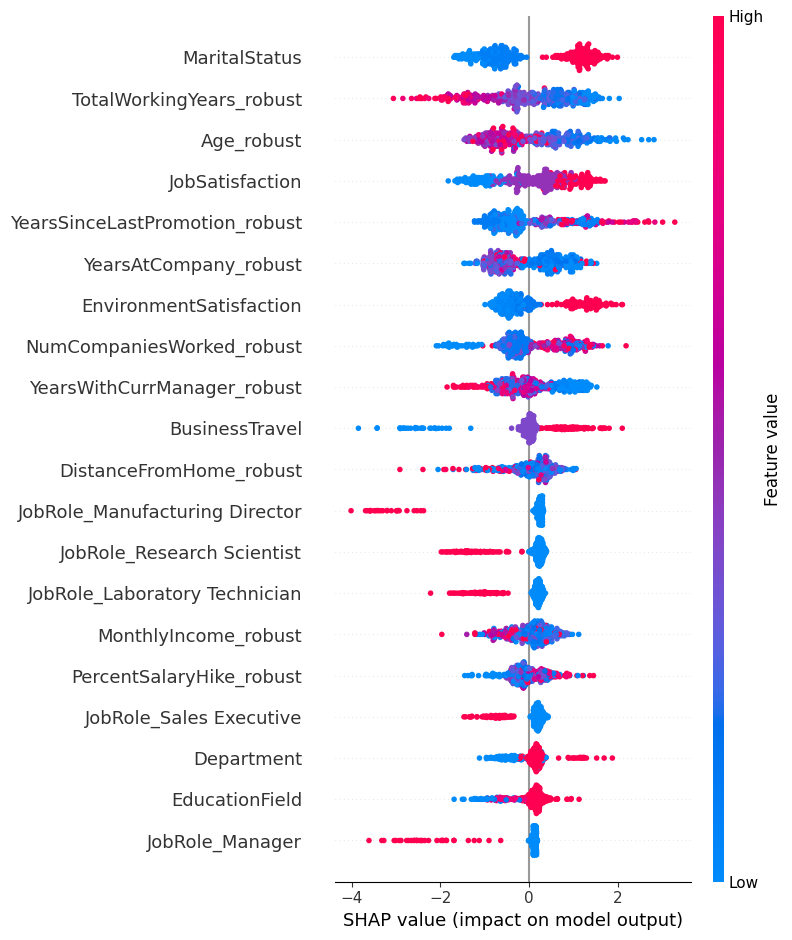

In [ ]:
logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting') 
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")

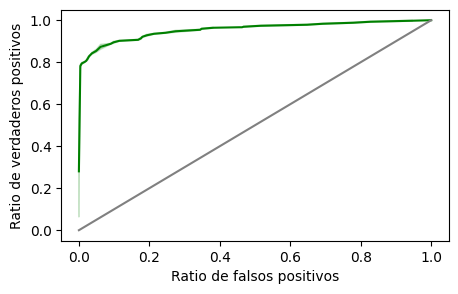

In [ ]:
logistica.graficar_roc('gradient_boosting')

## XGBoost

In [ ]:
params_xgb = {
                'n_estimators': [100, 200, 300, 350, 400],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5, 10, 12],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
}

In [ ]:
logistica.ajustar_modelo("xgboost") # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_xgb = logistica.calcular_metricas(modelo_nombre =  "xgboost")
df_xgb.head().T

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,train,test
accuracy,0.999448,0.902870
precision,0.999448,0.903616
recall,0.999448,0.902870
f1,0.999448,0.902600
kappa,0.998879,0.803765
auc,1.000000,0.953898
time_seconds,0.051826,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.051826
nucleos_usados,NaN,NaN


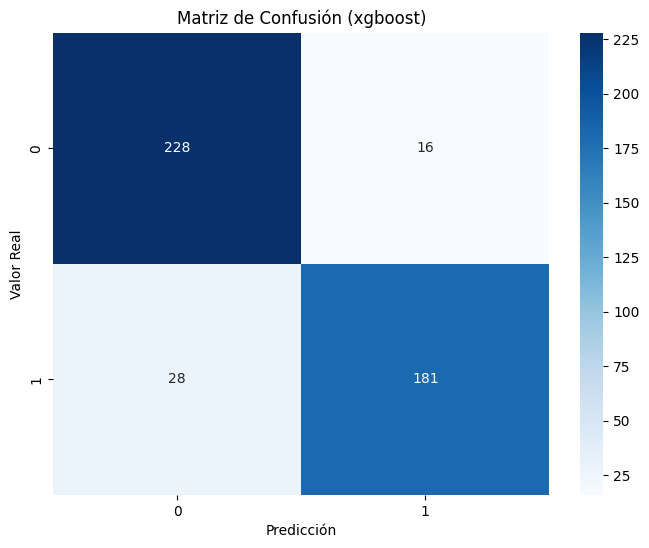

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Modelos\Modelo 3\../..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


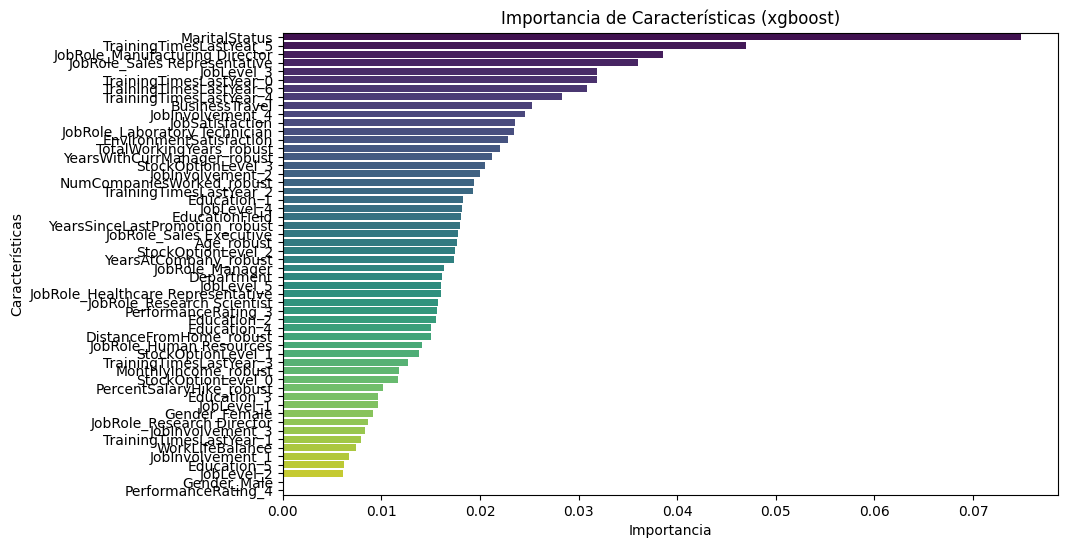

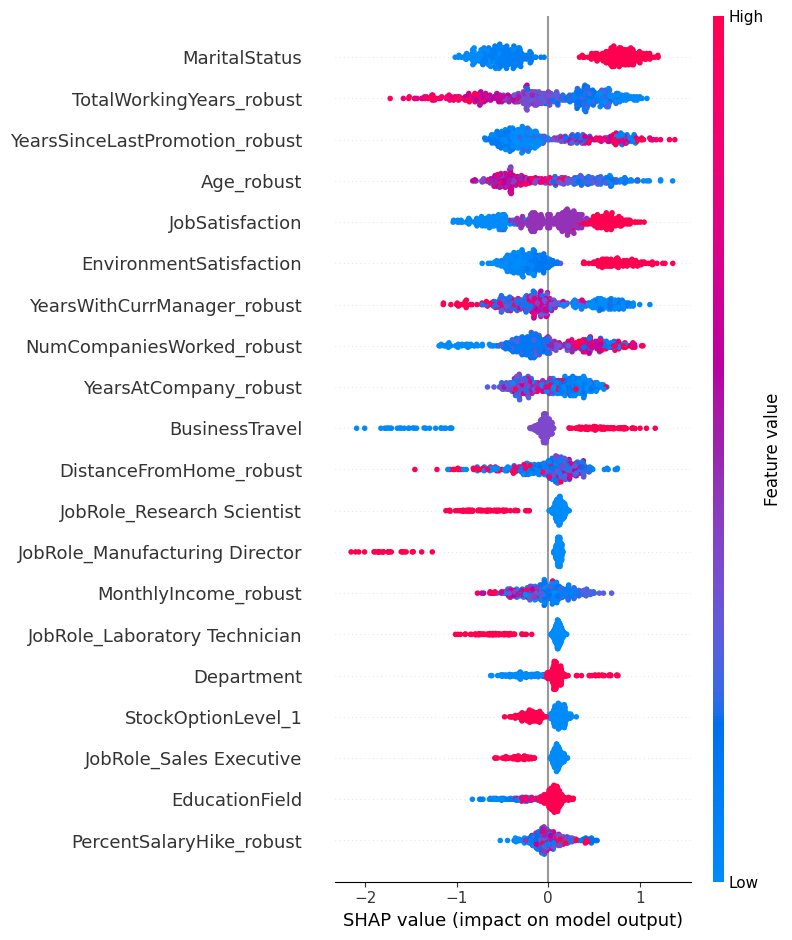

In [ ]:
logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost') 
logistica.plot_shap_summary(modelo_nombre="xgboost")

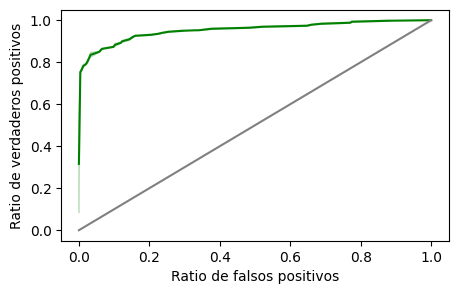

In [ ]:
logistica.graficar_roc('xgboost')

## Unión de modelos para comparar

In [ ]:
df_xgb['modelo'] = 'xgboost'
df_grad['modelo'] = 'gradient_boosting'
df_logreg['modelo'] = 'regresion logistica'
df_dectree['modelo'] = 'decision tree'
df_random['modelo'] = 'random_forest'

In [ ]:
df_modelos = pd.concat([df_xgb, df_grad, df_logreg, df_dectree, df_random])

In [ ]:
df_modelos
df_modelos.reset_index(drop=True, inplace=True)
df_concatenado = df_modelos.style.apply(sle.color_filas_por_modelo, axis=1)

In [ ]:
df_concatenado

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.999448,0.999448,0.999448,0.999448,0.998879,1.000000,0.051826,nan,nan,nan,xgboost
1,0.902870,0.903616,0.902870,0.902600,0.803765,0.953898,nan,nan,0.051826,nan,xgboost
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.029464,8.000000,nan,nan,gradient_boosting
3,0.911700,0.911976,0.911700,0.911550,0.821850,0.955957,nan,nan,0.029464,8.000000,gradient_boosting
4,0.875207,0.880548,0.875207,0.873539,0.742492,0.935477,0.003000,nan,nan,nan,regresion logistica
5,0.874172,0.879276,0.874172,0.873011,0.744288,0.927465,nan,nan,0.003000,nan,regresion logistica
6,0.914964,0.914901,0.914964,0.914892,0.827172,0.975236,0.005247,8.000000,nan,nan,decision tree
7,0.790287,0.793138,0.790287,0.790600,0.580502,0.840909,nan,nan,0.005247,8.000000,decision tree
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.186443,-1.000000,nan,nan,random_forest
9,0.913907,0.915783,0.913907,0.913531,0.825764,0.963448,nan,nan,0.186443,-1.000000,random_forest


Regresion Logística, buenos datos en el precision. Prefiero que no se vaya y que mi modelo diga que sí.

Resaltando que todos estos modelos no tienen balanceo en la variable respuesta, vamos a sacar el posible mejor modelo. Todos tienen métricas malas, pero si podemos señalar al mejor dentro de todos estos nos quedaremos con el decision tree. Este tiene métricas no muy distantes entre el train y el test para todas, sin embargo es el que mantiene cierto sentido en las métricas de kappa. Por eso este sería mi mejor modelo.